<a href="https://colab.research.google.com/github/rodrigoclira/mineracao-dados/blob/main/Agrupamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering (Agrupamento)
 
O clustering (agrupamento) é uma técnica de machine learning não supervisionada, usada para dividir um grupo em conjuntos. É não supervisionada porque não fornecemos nenhum rótulo (label) ao modelo; ele simplesmente inspeciona os atributos e determina quais amostras são semelhantes e pertencem a um cluster. Neste capítulo, veremos os métodos K-means (K-médias) e o clustering hierárquico. Também exploraremos o conjunto de dados do Titanic novamente usando várias técnicas.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.experimental import (
    enable_iterative_imputer,
)
from sklearn import (
    ensemble,
    impute,
    model_selection,    
    preprocessing,
    tree,
)
from sklearn.ensemble import (
    RandomForestClassifier,
)
from yellowbrick.model_selection import (
    ValidationCurve,
)

url = 'https://github.com/rodrigoclira/mineracao-dados/blob/main/datasets/titanic3.xls?raw=true'

df = pd.read_excel(url)
def tweak_titanic(df):
    df = df.drop(
        columns=[
            "name",
            "ticket",
            "home.dest",
            "boat",
            "body",
            "cabin",
        ]
    ).pipe(pd.get_dummies, drop_first=True)
    return df

def get_train_test_X_y(
    df, y_col, size=0.3, std_cols=None
):
    y = df[y_col]
    X = df.drop(columns=y_col)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(
        X, y, test_size=size, random_state=42
    )
    cols = X.columns
    num_cols = [
        "pclass",
        "age",
        "sibsp",
        "parch",
        "fare",
    ]
    fi = impute.IterativeImputer()

    fitted = fi.fit_transform(X_train[num_cols])
    X_train = X_train.assign(**{c:fitted[:,i] for i, c in enumerate(num_cols)})
    test_fit = fi.transform(X_test[num_cols])
    X_test = X_test.assign(**{c:test_fit[:,i] for i, c in enumerate(num_cols)})
    if std_cols:
        std = preprocessing.StandardScaler()
        fitted = std.fit_transform(X_train[std_cols])
        X_train = X_train.assign(**{c:fitted[:,i] for i, c in enumerate(std_cols)})
        test_fit = std.transform(X_test[std_cols])
        X_test = X_test.assign(**{c:test_fit[:,i] for i, c in enumerate(std_cols)})

    return X_train, X_test, y_train, y_test

ti_df = tweak_titanic(df)
std_cols = "pclass,age,sibsp,fare".split(",")
X_train, X_test, y_train, y_test = get_train_test_X_y(
    ti_df, "survived", std_cols=std_cols
)


X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [3]:
ti_df = tweak_titanic(df)
std_cols = "pclass,age,sibsp,fare".split(",")
X_train, X_test, y_train, y_test = get_train_test_X_y(
    ti_df, "survived", std_cols=std_cols
)
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

## KMeans

O algoritmo k-means (k-médias) exige que o usuário selecione o número de clusters, isto é, “k”. Então, ele escolhe aleatoriamente k centroides e atribui cada amostra a um cluster com base na métrica de distância a partir do centroide. Após a atribuição, os centroides são recalculados com base no centro de todas as amostras atribuídas a um rótulo. Em seguida, a atribuição das amostras aos clusters se repete com base nos novos centroides. Após algumas iterações, deve haver uma convergência. Como o clustering utiliza métricas de distância para determinar quais amostras são semelhantes, o comportamento poderá mudar dependendo da escala dos dados. Podemos padronizar os dados e colocar todos os atributos na mesma escala. Algumas pessoas sugeriram que um especialista no assunto poderia aconselhar contra uma padronização caso a escala sinalize que alguns atributos tenham mais importância. Em nosso exemplo, padronizaremos os dados. Criaremos clusters para os passageiros do Titanic em nosso caso. Começaremos com dois clusters para ver se o clustering é capaz de separar os sobreviventes (não faremos o vazamento dos dados de sobrevivência no
clustering, e usaremos apenas X, e não y).

Algoritmos não supervisionados têm um método .fit e um método .predict.
Passamos apenas X para .fit:

In [4]:
from sklearn.cluster import KMeans
X_std = preprocessing.StandardScaler().fit_transform(
    X
)
km = KMeans(2, random_state=42)
km.fit(X_std)

KMeans(n_clusters=2, random_state=42)

Depois que o modelo é treinado, podemos chamar o método .predict para atribuir novas amostras a um cluster:

In [5]:
X_km = km.predict(X)
X_km

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

Parâmetros da instância:
* n_clusters=8
Número de clusters a serem criados.

* init='kmeans++'
Método de inicialização.

* n_init=10
Número de vezes que o algoritmo deve executar com diferentes centroides.
A melhor pontuação vencerá.

* max_iter=300
Número de iterações para uma execução.

* tol=0.0001
Tolerância até a convergência.
* precompute_distances='auto'
Pré-calcular distâncias (exige mais memória, porém é mais rápido). auto fará
o cálculo prévio se n_samples * n_clusters for menor ou igual a 12 milhões.

*verbose=0
Verbosidade.

* random_state=None
Semente (seed) aleatória.

* copy_x=True
Copia dados antes de processar.

* n_jobs=1
Número de CPUs a serem usadas.

* algorithm='auto'
Algoritmo K-means. 'full' funciona com dados esparsos, mas 'elkan' é mais
eficaz. 'auto' usa 'elkan' com dados densos.

Atributos:
* cluster_centers_
Coordenadas dos centros.

* labels_
Rótulos para as amostras.

* inertia_
Soma dos quadrados das distâncias até o centroide do cluster.

* n_iter_
Número de iterações.

Se você não souber com antecedência quantos clusters serão necessários,
poderá executar o algoritmo com diversos tamanhos e avaliar várias métricas.
Pode ser complicado.
Você pode implementar o próprio gráfico elbow (gráfico de cotovelo) usando
o cálculo de .inertia_. Procure o ponto em que a curva dobra, pois essa será,
possivelmente, uma boa opção para o número de clusters. Em nosso caso, a
curva é suave, mas, depois de oito, não parece haver muita melhoria, como exibido na figura abaixo. 

Para gráficos sem um cotovelo, temos algumas opções. Podemos usar outras métricas, algumas das quais serão apresentadas a seguir. Também podemos inspecionar visualmente o clustering e ver se os clusters são visíveis. Podemos adicionar atributos aos dados e ver se isso ajuda no clustering. Eis o código para um gráfico de cotovelo:

Text(0, 0.5, 'Inertia')

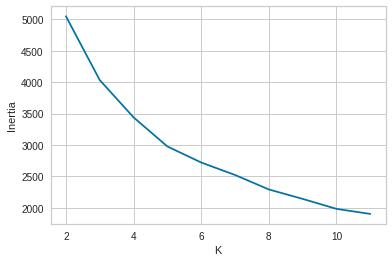

In [6]:
inertias = []
sizes = range(2, 12)
for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(X)
    inertias.append(k2.inertia_)
fig, ax = plt.subplots(figsize=(6, 4))
pd.Series(inertias, index=sizes).plot(ax=ax)
ax.set_xlabel("K")
ax.set_ylabel("Inertia")
#fig.savefig("images/mlpr_1801.png", dpi=300)

O scikit-learn tem outas métricas de clustering quando os verdadeiros rótulos
não são conhecidos. Podemos calcular esses valores e colocá-los em um gráfico também. O coeficiente de silhueta (silhouette coefficient) é um valor entre -1 e 1. Quanto maior o valor, melhor será. O valor 1 indica clusters mais claros, enquanto 0 implica clusters que se sobrepõem. A partir dessa medida, dois clusters nos dão a melhor pontuação. O Índice de Calinski-Harabasz é a razão entre a dispersão interclusters e a dispersão intracluster. Uma pontuação maior será melhor. Dois clusters dão a melhor pontuação para essa métrica.

O Índice de Davis-Bouldin é a semelhança média entre cada cluster e o cluster mais próximo. As pontuações variam de 0 ou mais. O valor 0 indica um clustering melhor. A seguir, colocaremos em um gráfico as informações de inércia, o coeficiente de silhueta, o Índice de Calinski-Harabasz e o Índice de Davies-Bouldin para diversos tamanhos de clusters, a fim de ver se há um tamanho evidente de clusters para os dados (veja a Figura abaixo). Parece que a maior parte dessas métricas concorda que deve haver dois clusters: 

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f6ded0150>,
      dtype=object)

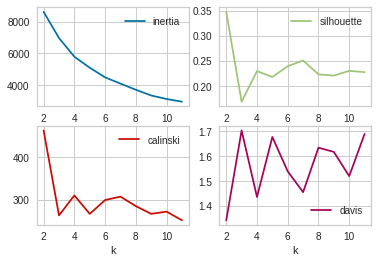

In [7]:
from sklearn import metrics
inertias = []
sils = []
chs = []
dbs = []
sizes = range(2, 12)
for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(X_std)
    inertias.append(k2.inertia_)
    sils.append(
        metrics.silhouette_score(X, k2.labels_)
    )
    chs.append(
        metrics.calinski_harabasz_score(
            X, k2.labels_
        )
    )
    dbs.append(
        metrics.davies_bouldin_score(
            X, k2.labels_
        )
    )
fig, ax = plt.subplots(figsize=(6, 4))
(
    pd.DataFrame(
        {
            "inertia": inertias,
            "silhouette": sils,
            "calinski": chs,
            "davis": dbs,
            "k": sizes,
        }
    )
    .set_index("k")
    .plot(ax=ax, subplots=True, layout=(2, 2))
)
#fig.savefig("images/mlpr_1802.png", dpi=300)

Outra técnica para determinar clusters é visualizar as pontuações de silhueta
para cada cluster. O Yellowbrick tem um visualizador para isso (veja a figura abaixo). A linha vermelha pontilhada vertical nesse gráfico é a pontuação média. Um modo de interpretar isso é garantir que cada cluster se destaque acima da média, e as pontuações do cluster pareçam razoáveis. Não se esqueça de usar os mesmos limites x (ax.set_xlim). A partir desses gráficos, eu optaria por dois clusters:

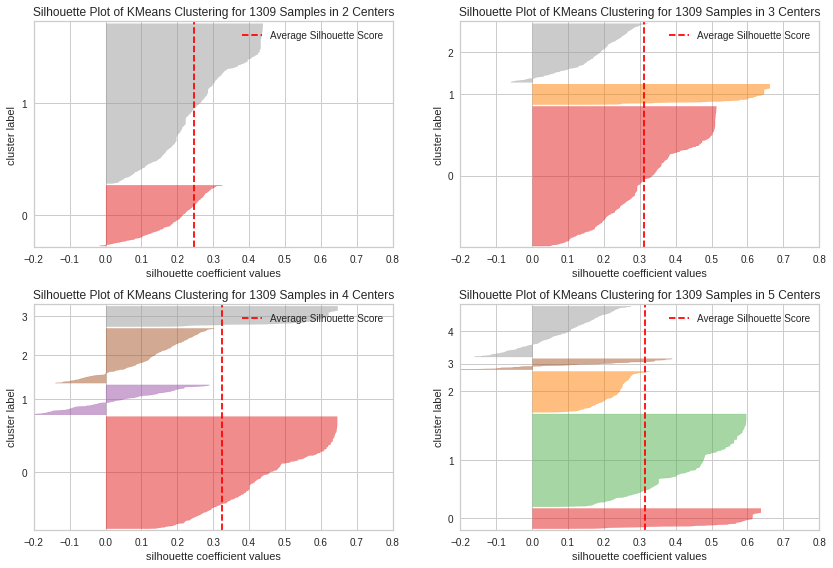

In [8]:
from yellowbrick.cluster.silhouette import (
    SilhouetteVisualizer,
)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.reshape(4)
for i, k in enumerate(range(2, 6)):
    ax = axes[i]
    sil = SilhouetteVisualizer(
        KMeans(n_clusters=k, random_state=42),
        ax=ax,
    )
    sil.fit(X_std)
    sil.finalize()
    ax.set_xlim(-0.2, 0.8)
plt.tight_layout()
#fig.savefig("images/mlpr_1803.png", dpi=300)

## Clustering (hierárquico) aglomerativo

Outra metodologia é o clustering aglomerativo (agglomerative clustering). Comece com cada amostra em seu próprio cluster. Em seguida, combine os clusters “mais próximos”. Repita até terminar, enquanto mantém o controle dos tamanhos mais próximos. Quando terminar, você terá um dendrograma, isto é, uma árvore que controla quando os clusters foram criados e qual é a métrica das distâncias. Podemos usar a biblioteca scipy para visualizar o dendrograma.

A scipy pode ser usada para criar um dendrograma (veja a figura abaixo).
Como podemos ver, se você tiver muitas amostras, será difícil ler os nós do
tipo folha:

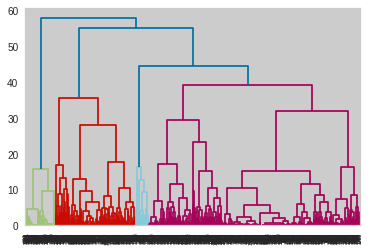

In [9]:
from scipy.cluster import hierarchy
fig, ax = plt.subplots(figsize=(6, 4))
dend = hierarchy.dendrogram(
    hierarchy.linkage(X_std, method="ward")
)
#fig.savefig("images/mlpr_1804.png", dpi=300)

Depois que tiver o dendrograma, você terá todos os clusters (de um até a quantidade de amostras). As alturas representam o nível de semelhança dos clusters quando são unidos. Para descobrir quantos clusters há nos dados, você poderia “passar” uma linha horizontal no ponto em que ela cruzaria as linhas mais altas. Nesse caso, ao traçar essa linha, você teria três clusters. O gráfico anterior apresenta um pouco de ruído, pois contém todas as amostras. Você também pode usar o parâmetro truncate_mode para combinar as folhas em um único nó (veja a figura abaixo):

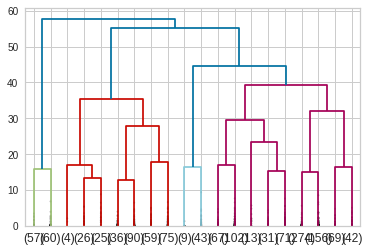

In [10]:
from scipy.cluster import hierarchy
fig, ax = plt.subplots(figsize=(6, 4))
dend = hierarchy.dendrogram(
    hierarchy.linkage(X_std, method="ward"),
    truncate_mode="lastp",
    p=20,
    show_contracted=True,
)
#fig.savefig("images/mlpr_1805.png", dpi=300)

Depois que soubermos quantos clusters serão necessários, poderemos usar o
scikit-learn para criar um modelo:

In [ ]:
from sklearn.cluster import (
    AgglomerativeClustering,
)
ag = AgglomerativeClustering(
    n_clusters=4,
    affinity="euclidean",
    linkage="ward",
)
ag.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4,
                        pooling_func='deprecated')

## Entendendo os clusters

Ao usar o K-means no conjunto de dados do Titanic, criaremos dois clusters.
Podemos usar a funcionalidade de agrupamento do pandas para analisar as  diferenças entre os clusters. O código a seguir analisa a média e a variância
para cada atributo. Parece que o valor médio de pclass varia bastante. Estou inserindo de volta os dados de sobrevivência para ver se o clustering estava relacionado com eles:

In [11]:
km = KMeans(n_clusters=2)
km.fit(X_std)
labels = km.predict(X_std)
(
    X.assign(cluster=labels, survived=y)
    .groupby("cluster")
    .agg(["mean", "var"])
    .T
)

cluster                 0         1
pclass     mean -1.420910  0.527478
           var   0.138897  0.265532
age        mean  0.922530 -0.281925
           var   1.145415  0.651165
sibsp      mean -0.108926 -0.009948
           var   0.303463  1.164827
parch      mean  0.377410  0.387949
           var   0.539488  0.830288
fare       mean  0.882876 -0.349293
           var   2.223786  0.056372
sex_male   mean  0.553719  0.678647
           var   0.247797  0.218316
embarked_Q mean  0.016529  0.123679
           var   0.016301  0.108497
embarked_S mean  0.586777  0.741015
           var   0.243140  0.192115
survived   mean  0.595041  0.300211
           var   0.241633  0.210307

Na figura abaixo, apresentamos um gráfico de barras das médias de cada
cluster:

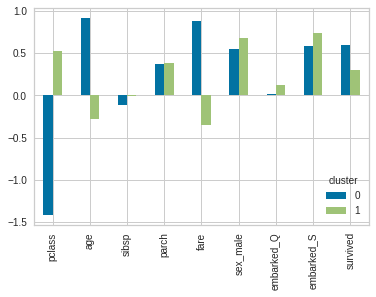

In [12]:
fig, ax = plt.subplots(figsize=(6, 4))
(
    X.assign(cluster=labels, survived=y)
    .groupby("cluster")
    .mean()
    .T.plot.bar(ax=ax)
)
# fig.savefig(
#     "images/mlpr_1806.png",
#     dpi=300,
#     bbox_inches="tight",
# )

Também gosto de colocar os componentes da PCA em um gráfico, porém coloridos de acordo com o rótulo do cluster (veja a figura abaixo). Nesse caso, usamos o Seaborn para isso. Também é interessante modificar os valores de hue para explorar os atributos que são distintos para os clusters.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


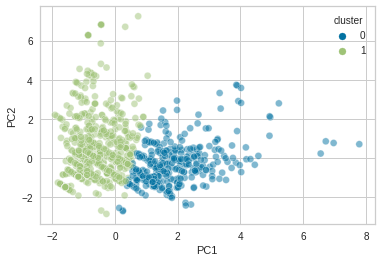

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import (
    StandardScaler,
)

fig, ax = plt.subplots(figsize=(6, 4))
pca = PCA(random_state=42)
X_pca = pca.fit_transform(
    StandardScaler().fit_transform(X)
)
sns.scatterplot(
    "PC1",
    "PC2",
    data=X.assign(
        PC1=X_pca[:, 0],
        PC2=X_pca[:, 1],
        cluster=labels,
    ),
    hue="cluster",
    alpha=0.5,
    ax=ax,
)
# fig.savefig(
#     "images/mlpr_1807.png",
#     dpi=300,
#     bbox_inches="tight",
# )

Se quisermos analisar um único atributo, podemos usar o método .describe do
pandas:

In [14]:
(
    X.assign(cluster=labels)
    .groupby("cluster")
    .age.describe()
    .T
)

cluster,0,1
count,363.000000,946.000000
mean,0.922530,-0.281925
std,1.070241,0.806948
min,-2.162722,-2.221251
25%,0.184938,-0.628414
50%,0.809247,-0.175242
75%,1.667672,0.106899
max,4.008830,3.540599


Também podemos criar um modelo substituto (surrogate model) para
explicar os clusters. Nesse caso, usaremos uma árvore de decisão para
explicá-los. Ele também mostra que pclass

In [15]:
dt = tree.DecisionTreeClassifier()
dt.fit(X, labels)
for col, val in sorted(
    zip(X.columns, dt.feature_importances_),
    key=lambda col_val: col_val[1],
    reverse=True,
):
    print(f"{col:10}{val:10.3f}")

pclass         0.902
age            0.077
sex_male       0.013
embarked_S     0.003
fare           0.003
parch          0.003
sibsp          0.000
embarked_Q     0.000


Podemos também visualizar as decisões na figura abaixo. Ela mostra que
pclass é o primeiro atributo que o modelo substituto observa para tomar uma
decisão:

In [ ]:
from io import StringIO
import pydotplus
dot_data = StringIO()
tree.export_graphviz(
    dt,
    out_file=dot_data,
    feature_names=X.columns,
    class_names=["0", "1"],
    max_depth=2,
    filled=True,
)
g = pydotplus.graph_from_dot_data(
    dot_data.getvalue()
)
#g.write_png("images/mlpr_1808.png")